## SQL and Python-Based Digital Media Store Data Analytics

This project represents a collaborative endeavor where each team member significantly contributed to its successful completion. The contributions in terms of time, effort, and intellectual input were distributed evenly among the team members.

The team consisted of the following individuals:

1. **Tiange (Tea) Chang**
2. **Angelika Crespo-Medina**
3. **Jack Connors**
4. **Mingzhao Liu**

Each member brought their unique strengths and skills to the project, and it's their collective efforts that have been instrumental in bringing this project to fruition.

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Establish a connection to the SQLite database
connection = sqlite3.connect("chinook.db")

In [3]:
# Function to execute query
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None 
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The Error '{e}' occurred.")
    return result

### Manager Promotion Analysis

Our task was to identify a current employee for promotion to the Sales Manager position within the store. To make this decision, we harnessed the power of the data available in our database. We adopted an approach that used each Sales Support Agent’s total sales as a key performance indicator. This metric gives us an insight into the volume of purchases each agent was accountable for. 

We made use of Python and SQL synergistically to solve this problem. SQL queries were deployed to calculate the total sales for each agent. Python was then utilized for visualizing these results, providing a comprehensive understanding of each agent's performance.

The success of our decision-making will be measured based on improvements in total sales, customer satisfaction, and team morale following the promotion of the new Sales Manager.


In [4]:
# Returned query results using fetchall()
q1 = '''
       WITH agent_sales AS
        (
            SELECT 
                i.CustomerId, 
                c.SupportRepId, 
                SUM(i.total) Total_Sales
            FROM 
                invoices i
                INNER JOIN customers c ON c.CustomerId = i.CustomerId
            GROUP BY 
                2
        )
        
        SELECT 
            e.FirstName || ' ' || e.LastName 'Employee Name', 
            SUM(csrs.Total_Sales) 'Sales'
        FROM 
            agent_sales csrs
            INNER JOIN employees e ON csrs.SupportRepId = e.EmployeeId
        GROUP BY 
            1
    ''' 

# Execute the SQL query and get the result
out1 = execute_read_query(connection, q1)

# Convert the results into a DataFramee
df = pd.DataFrame(data = out1, columns = ['Employee Name', 'Sales'])
df

,Employee Name,Sales
0,Jane Peacock,833.04
1,Margaret Park,775.40
2,Steve Johnson,720.16


### Conclusion

Our analysis revealed that Jane Peacock had the highest total sales, amounting to **$833.04**. Given our decision to use total sales as the determining factor for this promotion, we recommended **Jane Peacock** as the most suitable candidate for the Sales Manager position. This decision was based on data-driven insights and careful consideration.

### Histogram Data Analysis

Our aim in this section of the project was to visualize the frequency of customer visits to the store. The 'invoices' table within our SQL database was identified as the main source of data for this task, as it contained relevant invoice dates and associated customer identifiers.

The first step in our approach was to extract invoice date data from SQL into Python. This data was then housed in a new dataframe to ease the subsequent conversion process. A 'for' loop was implemented to convert the invoice date strings in the dataframe into a format that facilitated calculation of the difference between successive customer visits. These calculated differences were then appended to a list, with each entry signifying the number of days between visits. 

The final step in this data transformation was to represent these date differences in a histogram, providing an easy-to-interpret visualization of visit frequencies.

In [5]:
# Function to calculate the difference in days between each date
def calculate_date_diffs(invoice_dates):
    date_diffs = [invoice_dates[i+1] - invoice_dates[i] for i in range(len(invoice_dates)-1)]
    return [diff.days for diff in date_diffs]

In [6]:
# Query string
q2 = '''
        SELECT DISTINCT InvoiceDate
        FROM invoices
    '''

# Execute SQL query and get results
out2 = execute_read_query(connection, q2)

# Convert the results into a DataFrame
df2 = pd.DataFrame(data = out2, columns = ['InvoiceDate'])
df2

,InvoiceDate
0,2009-01-01 00:00:00
1,2009-01-02 00:00:00
2,2009-01-03 00:00:00
3,2009-01-06 00:00:00
4,2009-01-11 00:00:00
...,...
349,2013-12-05 00:00:00
350,2013-12-06 00:00:00
351,2013-12-09 00:00:00
352,2013-12-14 00:00:00


In [7]:
# Convert InvoiceDate strings into datetime format
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2

,InvoiceDate
0,2009-01-01
1,2009-01-02
2,2009-01-03
3,2009-01-06
4,2009-01-11
...,...
349,2013-12-05
350,2013-12-06
351,2013-12-09
352,2013-12-14


In [8]:
# Calculate the differences in days between each invoice date
daylist = calculate_date_diffs(df2['InvoiceDate'])
print(daylist)

[1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5, 8, 13, 1, 1, 3, 5,

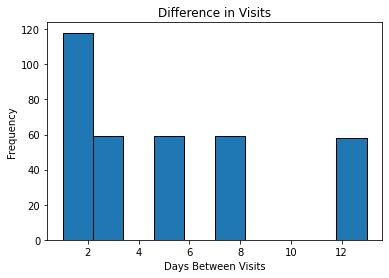

In [9]:
# Convert the list of day differences into a DataFrame
hist = pd.DataFrame(daylist, columns=['DifferenceInVisits'])

# Plot a histogram of the differences in visits
plt.hist(hist['DifferenceInVisits'], bins='auto', edgecolor='black')
plt.title('Difference in Visits')
plt.xlabel('Days Between Visits')
plt.ylabel('Frequency')
plt.show()

### Conclusion

Analysis of the histogram revealed that most customer visits occurred within a day of the previous visit. However, we were able to identify five distinct visit frequency categories, or 'bins' (as presented above). 

One particularly interesting observation was the short intervals between purchases, indicating a high frequency of store visits. This insight could be invaluable for store management in ensuring that full inventory levels are maintained in anticipation of high customer turnout.

The Python code used for this analysis is flexible enough to accommodate new variables and tables from our database, allowing us to delve deeper into customer behavior and derive even more valuable insights. By implementing this analysis, we aim to increase profitability, enhance customer retention, and improve overall store performance.

### Consumer Market Analysis

Our selected metric for this part of the project was the 'total revenue generated from each country.' As a music store, we identified the value of understanding our largest consumer markets for better market segmentation. To achieve this, we employed both SQL and Python.

By having a clear picture of our top markets, we could design more targeted marketing strategies tailored to the unique needs of each segment. This approach is likely to increase profitability and improve competitiveness. Furthermore, it would empower our marketers to craft innovative promotional ideas that consider cultural differences, enabling our store to stand out among its competitors.

In [10]:
# Query definition - select total billed amounts by country in descending order
q3 = '''
        SELECT i.BillingCountry, ROUND(SUM(total), 2) 
        AS 'TotalByCountry' 
        FROM invoices i
        GROUP BY BillingCountry
        ORDER BY TotalByCountry DESC;       
    ''' 

# Execute query and fetch results
out3 = execute_read_query(connection, q3)

# Convert SQL query results into a Pandas DataFrame
df3 = pd.DataFrame(data = out3, columns = ['BillingCountry', 'TotalByCountry'])
df3

,BillingCountry,TotalByCountry
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### Conclusion

Our data-driven analysis provided valuable insights into the largest consumer markets for our store. These are summarized in the table below:

| Country   | Total Revenue |
|-----------|---------------|
| USA       | \$523.06      |
| Canada    | \$303.96      |
| France    | \$195.10      |
| Brazil    | \$190.10      |
| Germany   | \$156.48      |

(See above for full results)

This information will significantly inform our future marketing strategies, ensuring they are appropriately targeted to maximize both impact and return on investment.

### Customer Spend Analysis

This part of the analysis focuses on customers who are high spenders. Specifically, we identified customers who ranked 2nd, 3rd, 5th, 8th, and 12th highest in total purchasing. By understanding their profiles, we can develop tailored marketing strategies to further engage these customers.

For this analysis, we used SQL and Python to create a table showing each customer's first name, last name, address, phone number, email, and total spend. We assigned a rank to each customer based on their total spend, from highest to lowest.

In [11]:
# Define SQL query
q4 = '''
    WITH ranked_customers AS (
        SELECT c.CustomerId,
               c.FirstName,
               c.LastName,
               c.Address,
               c.Phone,
               c.Email,
               SUM(i.Total) as TotalSpending,
               DENSE_RANK() OVER(ORDER BY SUM(i.Total) DESC) as Rank
        FROM customers c
        JOIN invoices i ON c.CustomerId = i.CustomerId
        GROUP BY c.CustomerId
    )
    SELECT FirstName, LastName, Address, Phone, Email, TotalSpending, Rank
    FROM ranked_customers
    WHERE Rank IN (2, 3, 5, 8, 12);
'''

# Execute query and fetch results
out4 = execute_read_query(connection, q4)

# Convert results into DataFrame
df4 = pd.DataFrame(out4, columns=['FirstName', 'LastName', 'Address', 
                                     'Phone', 'Email', 'TotalSpending', 'Rank'])
df4

,FirstName,LastName,Address,Phone,Email,TotalSpending,Rank
0,Richard,Cunningham,2211 W Berry Street,+1 (817) 924-7272,ricunningham@hotmail.com,47.62,2
1,Luis,Rojas,"Calle Lira, 198",+56 (0)2 635 4444,luisrojas@yahoo.cl,46.62,3
2,Julia,Barnett,302 S 700 E,+1 (801) 531-7272,jubarnett@gmail.com,43.62,5
3,Terhi,Hämäläinen,Porthaninkatu 9,+358 09 870 2000,terhi.hamalainen@apple.fi,41.62,8
4,Luís,Gonçalves,"Av. Brigadeiro Faria Lima, 2170",+55 (12) 3923-5555,luisg@embraer.com.br,39.62,12
5,François,Tremblay,1498 rue Bélanger,+1 (514) 721-4711,ftremblay@gmail.com,39.62,12
6,Bjørn,Hansen,Ullevålsveien 14,+47 22 44 22 22,bjorn.hansen@yahoo.no,39.62,12
7,Dan,Miller,541 Del Medio Avenue,+1 (650) 644-3358,dmiller@comcast.com,39.62,12
8,Heather,Leacock,120 S Orange Ave,+1 (407) 999-7788,hleacock@gmail.com,39.62,12
9,Wyatt,Girard,"9, Place Louis Barthou",+33 05 56 96 96 96,wyatt.girard@yahoo.fr,39.62,12


### Conclusion

Our analysis identified Richard Cunningham, Luis Rojas, Julia Barnett, and Terhi Hämäläinen as the 2nd, 3rd, 5th, and 8th highest spending customers, respectively. Interestingly, there was a 6-way tie for the 12th position among Luís Gonçalves, François Tremblay, Bjørn Hansen, Dan Miller, Heather Leacock, and Wyatt Girard.

By targeting these high-spending customers with tailored marketing initiatives, we can potentially increase their spend further, enhancing the store's overall profitability.